### Part I: Data Analysis – Amazon Top Selling Book Dataset
   


In [1]:
#import libraries
import numpy as np
import pandas as pd

from scipy.stats import zscore
from scipy.stats import zmap

import matplotlib.pyplot as plt
import seaborn as sns

### Load Dataset

In [5]:
amazon_df = pd.read_csv("Amazon_top_selling_book.csv")
amazon_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction


### Exploratory Data Analysis 

In [6]:
amazon_df.head()

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12,2019,Non Fiction


In [7]:
amazon_df.tail()

,Name,Author,User Rating,Reviews,Price,Year,Genre
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2018,Non Fiction
549,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8,2019,Non Fiction


In [8]:
amazon_df.index

RangeIndex(start=0, stop=550, step=1)

In [9]:
amazon_df.describe()

,User Rating,Reviews,Price,Year
count,550.000000,550.000000,550.000000,550.000000
mean,4.618364,11953.281818,13.100000,2014.000000
std,0.226980,11731.132017,10.842262,3.165156
min,3.300000,37.000000,0.000000,2009.000000
25%,4.500000,4058.000000,7.000000,2011.000000
50%,4.700000,8580.000000,11.000000,2014.000000
75%,4.800000,17253.250000,16.000000,2017.000000
max,4.900000,87841.000000,105.000000,2019.000000


In [10]:
amazon_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550 entries, 0 to 549
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Name         550 non-null    object 
 1   Author       550 non-null    object 
 2   User Rating  550 non-null    float64
 3   Reviews      550 non-null    int64  
 4   Price        550 non-null    int64  
 5   Year         550 non-null    int64  
 6   Genre        550 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 30.2+ KB


In [11]:
amazon_df.shape

(550, 7)

In [12]:
amazon_df.columns

Index(['Name', 'Author', 'User Rating', 'Reviews', 'Price', 'Year', 'Genre'], dtype='object')

In [13]:
amazon_df.nunique(axis=0)

Name           351
Author         248
User Rating     14
Reviews        346
Price           40
Year            11
Genre            2
dtype: int64

In [14]:
amazon_df.dtypes

Name            object
Author          object
User Rating    float64
Reviews          int64
Price            int64
Year             int64
Genre           object
dtype: object

In [15]:
amazon_df.ndim

2

### Data Preprocessing

#### checking missing values

In [16]:
amazon_df.isnull().sum(axis=0)

Name           0
Author         0
User Rating    0
Reviews        0
Price          0
Year           0
Genre          0
dtype: int64

#### checking duplicates

In [19]:
amazon_df[amazon_df.duplicated()]

,Name,Author,User Rating,Reviews,Price,Year,Genre


#### change types of Data

In [20]:
amazon_df['Price'] = amazon_df['Price'].astype(float)

In [21]:
amazon_df['Name'] = amazon_df['Name'].astype(str)

In [22]:
amazon_df['Author'] = amazon_df['Author'].astype(str)

In [23]:
amazon_df['Genre'] = amazon_df['Genre'].astype('category')

In [24]:
amazon_df['Name'] = amazon_df['Name'].str.strip()

In [25]:
amazon_df['Author'] = amazon_df['Author'].str.strip()

#### Detecting outliers

In [26]:

zscore_Price= zscore(amazon_df['Price'])

In [27]:
zscore_Price

0     -0.470810
1      0.821609
2      0.175400
3     -0.655441
4     -0.101547
         ...   
545   -0.470810
546   -0.470810
547   -0.470810
548   -0.470810
549   -0.470810
Name: Price, Length: 550, dtype: float64

In [28]:
amazon_df = amazon_df[(zscore_Price<3)&(zscore_Price>-3)]

In [29]:
amazon_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8.0,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2018,Non Fiction


In [30]:
zscore_Reviews= zscore(amazon_df['Reviews'])

In [31]:
amazon_df = amazon_df[(zscore_Reviews<3)&(zscore_Reviews>-3)]

In [32]:
amazon_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,Non Fiction
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,Fiction
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,Non Fiction
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,Fiction
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,Non Fiction
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8.0,2019,Fiction
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2016,Non Fiction
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2017,Non Fiction
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2018,Non Fiction


In [33]:
amazon_df['Genre'] = amazon_df['Genre'].cat.codes

C:\Users\singh\AppData\Local\Temp\ipykernel_12644\2307994808.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  amazon_df['Genre'] = amazon_df['Genre'].cat.codes


In [34]:
amazon_df

,Name,Author,User Rating,Reviews,Price,Year,Genre
0,10-Day Green Smoothie Cleanse,JJ Smith,4.7,17350,8.0,2016,1
1,11/22/63: A Novel,Stephen King,4.6,2052,22.0,2011,0
2,12 Rules for Life: An Antidote to Chaos,Jordan B. Peterson,4.7,18979,15.0,2018,1
3,1984 (Signet Classics),George Orwell,4.7,21424,6.0,2017,0
4,"5,000 Awesome Facts (About Everything!) (Natio...",National Geographic Kids,4.8,7665,12.0,2019,1
...,...,...,...,...,...,...,...
545,Wrecking Ball (Diary of a Wimpy Kid Book 14),Jeff Kinney,4.9,9413,8.0,2019,0
546,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2016,1
547,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2017,1
548,You Are a Badass: How to Stop Doubting Your Gr...,Jen Sincero,4.7,14331,8.0,2018,1


### Data Visualization

#### year wise data for count if books , average price, ... 

In [36]:
Yearly_data = amazon_df.groupby(['Year']).agg({'Name':'count','Price':'mean','Reviews':'mean','User Rating':'mean'}).reset_index()

In [37]:
Yearly_data.rename(columns={'Name':'Count_of_books',"Price":'Average_price',"Reviews":"Average_reviews",'User Rating':'Average_rating'},inplace=True)

In [38]:
Yearly_data

,Year,Count_of_books,Average_price,Average_reviews,Average_rating
0,2009,47,12.531915,4729.085106,4.580851
1,2010,49,12.816327,5416.346939,4.559184
2,2011,49,14.469388,8091.040816,4.559184
3,2012,47,14.808511,11451.340426,4.540426
4,2013,46,12.086957,11562.934783,4.565217
5,2014,45,12.266667,13766.733333,4.637778
6,2015,47,9.489362,12220.319149,4.659574
7,2016,45,10.866667,12292.177778,4.684444
8,2017,49,10.673469,12976.326531,4.663265
9,2018,48,9.770833,13058.500000,4.668750


#### Correlation matrix

In [41]:
amazon_corr_matrix = amazon_df.corr()

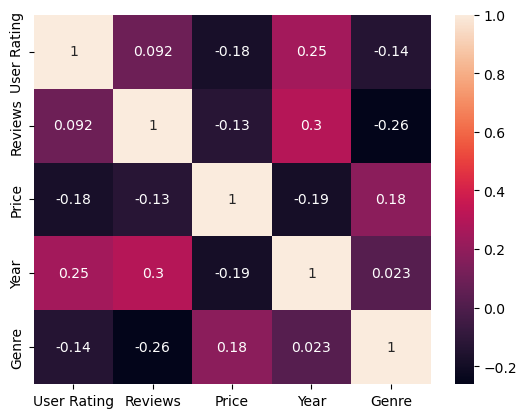

In [42]:
sns.heatmap(amazon_corr_matrix, annot=True)
plt.show()

#### Year wise countof books 

Text(0, 0.5, 'Count of Books')

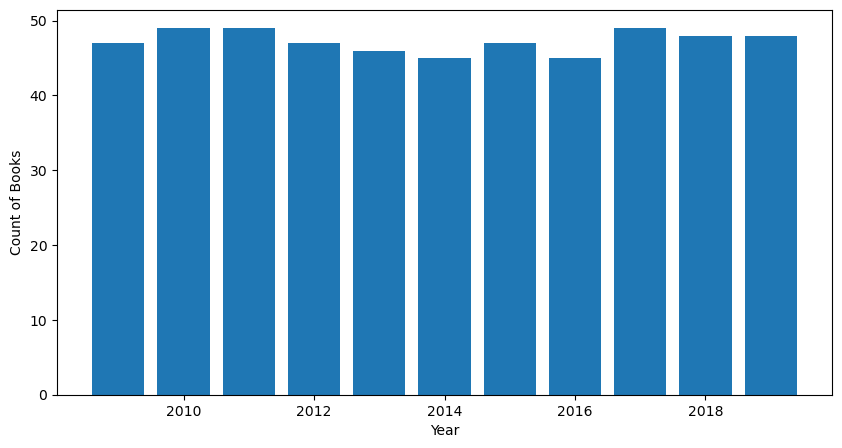

In [44]:
fig = plt.figure(figsize = (10, 5))
plt.bar( Yearly_data['Year'],  Yearly_data['Count_of_books'])
plt.xlabel('Year')
plt.ylabel('Count of Books')

#### Year wise Average price , average reviews and average rating trends

Text(0, 0.5, 'Average_price')

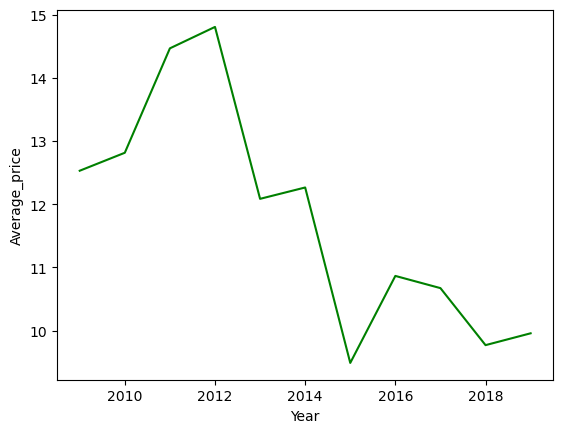

In [45]:

plt.plot( Yearly_data['Year'],  Yearly_data['Average_price'] , color='green')
plt.xlabel('Year')
plt.ylabel('Average_price')

Text(0, 0.5, 'Average_reviews')

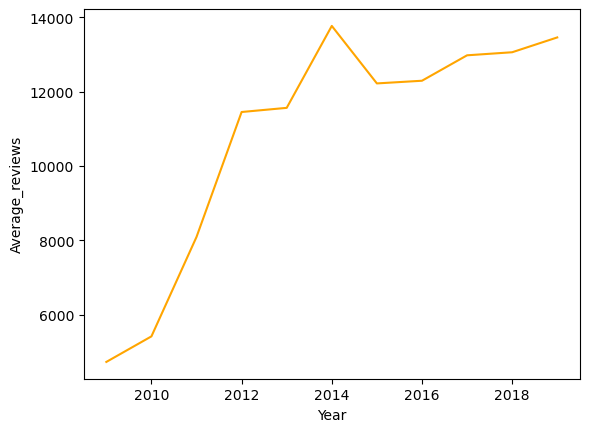

In [46]:
plt.plot( Yearly_data['Year'],  Yearly_data['Average_reviews'] , color='orange')
plt.xlabel('Year')
plt.ylabel('Average_reviews')

Text(0, 0.5, 'Average_rating')

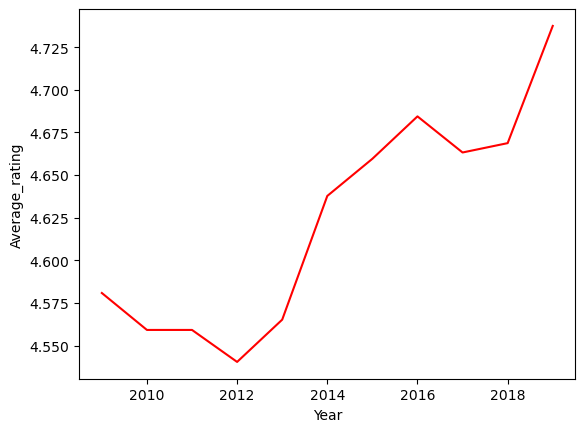

In [47]:
plt.plot( Yearly_data['Year'],  Yearly_data['Average_rating'] , color='red')
plt.xlabel('Year')
plt.ylabel('Average_rating')

#### top selling books in both genre

In [48]:
Books_quality = amazon_df.groupby(['Name']).agg({'Author':'count' ,'User Rating':'mean'}).reset_index()

In [49]:
Books_quality.rename(columns={'Name':'BookName', 'Author':'Count_of_sold','User Rating':'AverageRating'},inplace=True)

In [50]:
Books_quality.sort_values(by='Count_of_sold',ascending= False , inplace=True)

In [51]:
Books_quality_top10 = Books_quality.head(10)

Text(0, 0.5, 'Count of Sold')

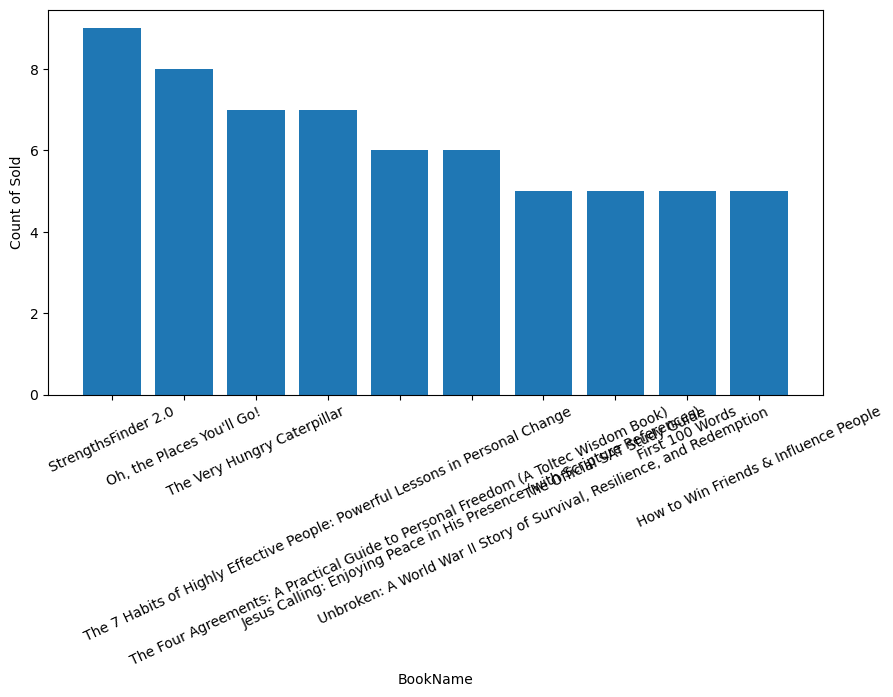

In [52]:
fig = plt.figure(figsize = (10, 5))
plt.bar( Books_quality_top10['BookName'],  Books_quality_top10['Count_of_sold'])
plt.xticks(rotation=25) 
plt.xlabel('BookName')
plt.ylabel('Count of Sold')

#### Authors with high Rating

In [53]:
author_rating = amazon_df.groupby(['Author']).agg({'User Rating':'mean'}).reset_index()

In [54]:
author_rating.rename(columns={'Author':'AuthorName','User Rating':'AverageRating'},inplace=True)

In [55]:
author_rating.sort_values(by='AverageRating',ascending= False , inplace=True)

In [56]:
author_rating.head(10)

,AuthorName,AverageRating
197,Rush Limbaugh,4.9
107,J. K. Rowling,4.9
202,Sarah Young,4.9
55,Dav Pilkey,4.9
38,Chip Gaines,4.9
78,Emily Winfield Martin,4.9
79,Eric Carle,4.9
24,Bill Martin Jr.,4.9
174,Pete Souza,4.9
170,Patrick Thorpe,4.9


#### Rating vs price comparision

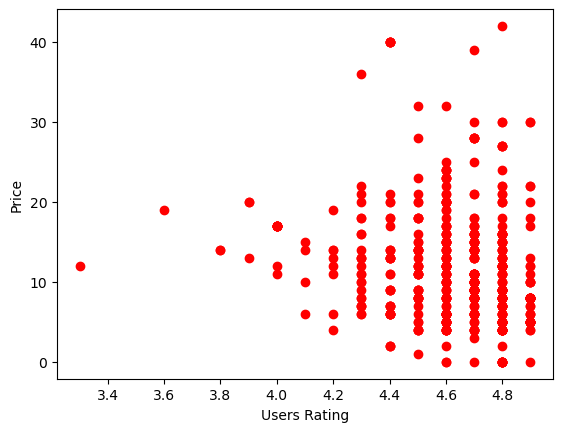

In [57]:
plt.scatter(amazon_df['User Rating'], amazon_df['Price'] , color= 'red')
 
plt.xlabel("Users Rating")
plt.ylabel("Price")
plt.show();

#### Reviews vs Price Trend

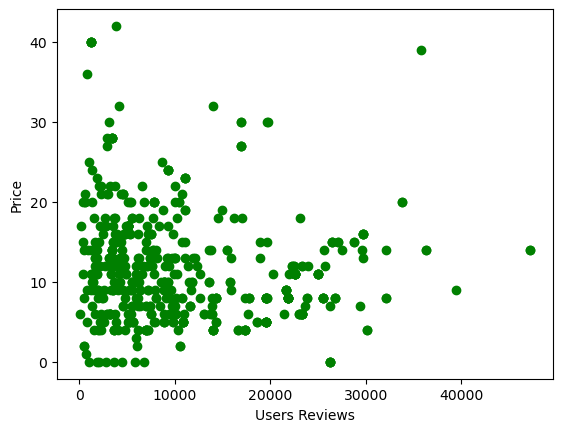

In [60]:
plt.scatter(amazon_df['Reviews'], amazon_df['Price'] , color= 'green')
 
plt.xlabel("Users Reviews")
plt.ylabel("Price")
plt.show();

In [61]:
#Rating vs Reviews Trend

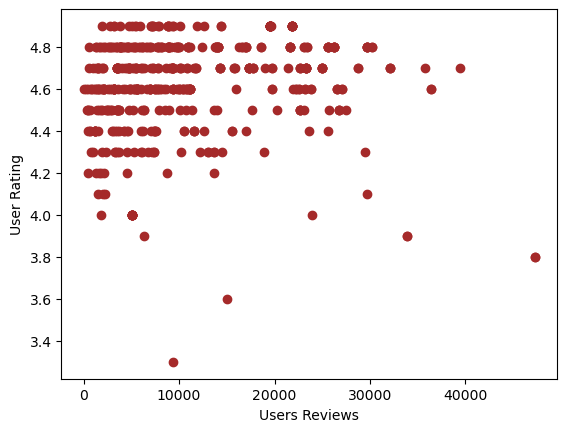

In [62]:
plt.scatter(amazon_df['Reviews'], amazon_df['User Rating'] , color= 'brown')
 
plt.xlabel("Users Reviews")
plt.ylabel("User Rating")
plt.show();

Text(0.5, 1.0, 'Genre Vs price')

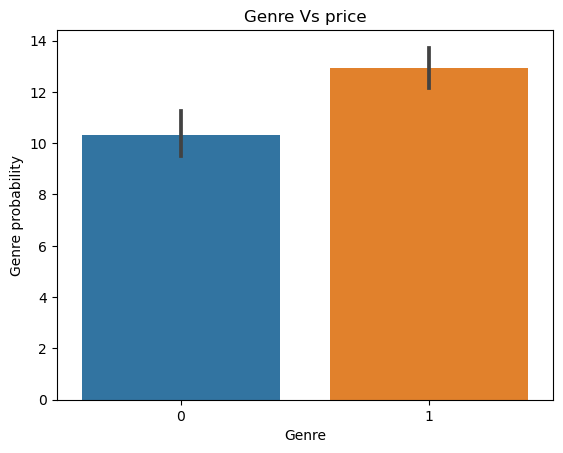

In [63]:
sns.barplot(x='Genre',y = 'Price',data = amazon_df)
plt.ylabel("Genre probability")
plt.title("Genre Vs price")

Text(0.5, 1.0, 'Genre vs Reviews')

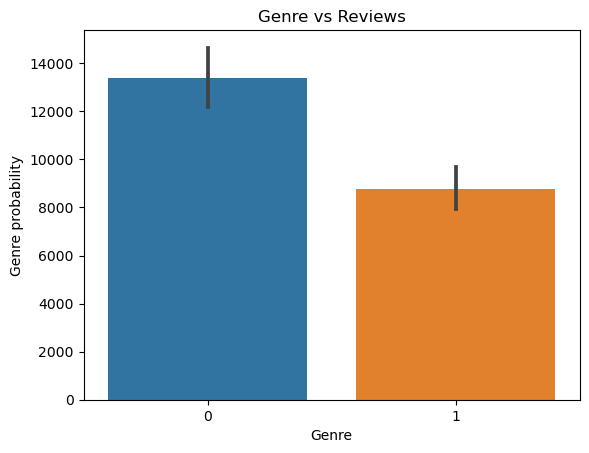

In [64]:
sns.barplot(x='Genre',y = 'Reviews',data = amazon_df)
plt.ylabel("Genre probability")
plt.title("Genre vs Reviews")

Text(0.5, 1.0, 'Genre vs Rating')

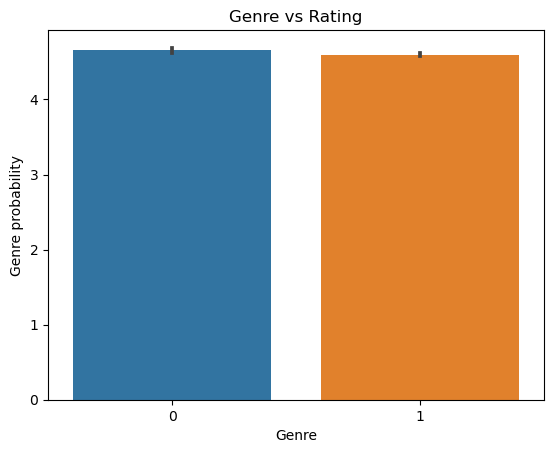

In [65]:
sns.barplot(x='Genre',y = 'User Rating',data = amazon_df)
plt.ylabel("Genre probability")
plt.title("Genre vs Rating")

## Part I: Data Analysis – Titanic  dataset

In [77]:
#Load Dataset:

In [78]:
titanic_df = pd.read_csv("datasets/titanic.csv")

In [79]:
#Exploratory data analysis

In [80]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500


In [81]:
titanic_df.tail()

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.00
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.00
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.45
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.00
886,0,3,Mr. Patrick Dooley,male,32.0,0,0,7.75


In [82]:
titanic_df.describe()

,Survived,Pclass,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
count,887.000000,887.000000,887.000000,887.000000,887.000000,887.00000
mean,0.385569,2.305524,29.471443,0.525366,0.383315,32.30542
std,0.487004,0.836662,14.121908,1.104669,0.807466,49.78204
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.00000
25%,0.000000,2.000000,20.250000,0.000000,0.000000,7.92500
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.45420
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.13750
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.32920


In [83]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 887 entries, 0 to 886
Data columns (total 8 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Survived                 887 non-null    int64  
 1   Pclass                   887 non-null    int64  
 2   Name                     887 non-null    object 
 3   Sex                      887 non-null    object 
 4   Age                      887 non-null    float64
 5   Siblings/Spouses Aboard  887 non-null    int64  
 6   Parents/Children Aboard  887 non-null    int64  
 7   Fare                     887 non-null    float64
dtypes: float64(2), int64(4), object(2)
memory usage: 55.6+ KB


In [84]:
titanic_df.shape

(887, 8)

In [85]:
titanic_df.ndim

2

In [86]:
titanic_df.dtypes

Survived                     int64
Pclass                       int64
Name                        object
Sex                         object
Age                        float64
Siblings/Spouses Aboard      int64
Parents/Children Aboard      int64
Fare                       float64
dtype: object

In [87]:
titanic_df.nunique(axis=0)

Survived                     2
Pclass                       3
Name                       887
Sex                          2
Age                         89
Siblings/Spouses Aboard      7
Parents/Children Aboard      7
Fare                       248
dtype: int64

In [88]:
titanic_df.index

RangeIndex(start=0, stop=887, step=1)

In [89]:
#Data Preprocessing

In [90]:
#missing Values

In [91]:
titanic_df.isnull().sum(axis=0)

Survived                   0
Pclass                     0
Name                       0
Sex                        0
Age                        0
Siblings/Spouses Aboard    0
Parents/Children Aboard    0
Fare                       0
dtype: int64

In [92]:
#Duplicates

In [93]:
titanic_df[titanic_df.duplicated()]

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare


In [94]:
titanic_df.duplicated().sum()

0

In [95]:
titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'Siblings/Spouses Aboard',
       'Parents/Children Aboard', 'Fare'],
      dtype='object')

In [96]:
#Type conversion

In [97]:
titanic_df["Name"] = titanic_df["Name"].astype(str)

In [98]:
titanic_df["Sex"]  = titanic_df["Sex"].astype('category')

In [99]:
#outlier Detection

In [100]:
zscore_fare= zscore(titanic_df['Fare'])

In [101]:
titanic_df = titanic_df[(zscore_fare<3)&(zscore_fare>-3)]

In [102]:
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,male,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,female,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,female,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,female,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,male,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,male,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,female,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,female,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,male,26.0,0,0,30.0000


In [103]:
zscore_Age= zscore(titanic_df['Age'])

In [104]:
titanic_df = titanic_df[(zscore_Age<3)&(zscore_Age>-3)]

In [105]:
# Encoding

In [106]:
titanic_df['Sex'] = titanic_df['Sex'].cat.codes

/var/folders/ct/ljsh1x9s71b38tl5c67k9zlm0000gn/T/ipykernel_99891/2842490914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_df['Sex'] = titanic_df['Sex'].cat.codes


In [107]:
titanic_df

,Survived,Pclass,Name,Sex,Age,Siblings/Spouses Aboard,Parents/Children Aboard,Fare
0,0,3,Mr. Owen Harris Braund,1,22.0,1,0,7.2500
1,1,1,Mrs. John Bradley (Florence Briggs Thayer) Cum...,0,38.0,1,0,71.2833
2,1,3,Miss. Laina Heikkinen,0,26.0,0,0,7.9250
3,1,1,Mrs. Jacques Heath (Lily May Peel) Futrelle,0,35.0,1,0,53.1000
4,0,3,Mr. William Henry Allen,1,35.0,0,0,8.0500
...,...,...,...,...,...,...,...,...
882,0,2,Rev. Juozas Montvila,1,27.0,0,0,13.0000
883,1,1,Miss. Margaret Edith Graham,0,19.0,0,0,30.0000
884,0,3,Miss. Catherine Helen Johnston,0,7.0,1,2,23.4500
885,1,1,Mr. Karl Howell Behr,1,26.0,0,0,30.0000


In [108]:
# Data Visualization

In [109]:
titanic_corr_matrix = titanic_df.corr()

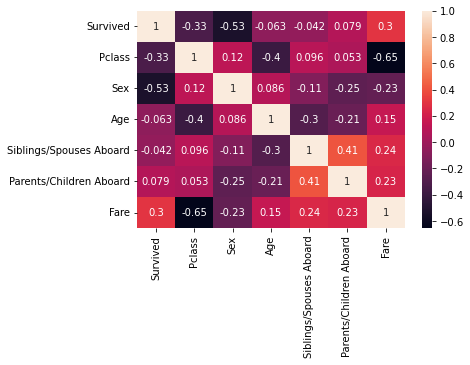

In [110]:
sns.heatmap(titanic_corr_matrix, annot=True)
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

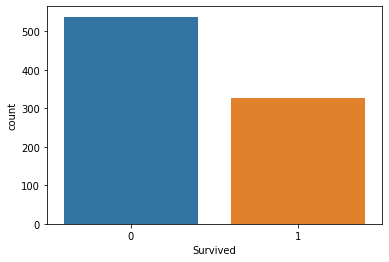

In [111]:
sns.countplot(titanic_df["Survived"],data = titanic_df)

In [112]:
#features vs Target ( Survived)

Text(0.5, 1.0, 'Sex of Passenger by Survived')

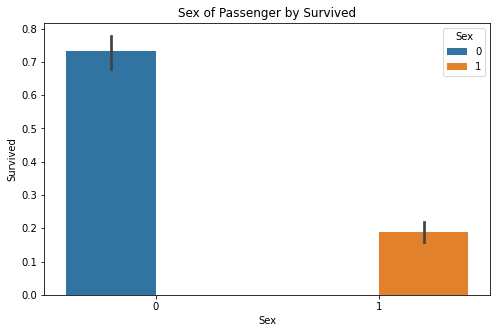

In [113]:
plt.figure(figsize=(8,5))
sns.barplot(x='Sex',y='Survived',hue = titanic_df["Sex"],data=titanic_df)
plt.title("Sex of Passenger by Survived")

Text(0.5, 1.0, 'Siblings/Spouses Aboard of Passenger by Survived')

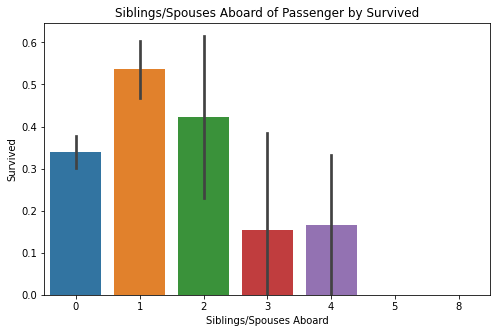

In [114]:
plt.figure(figsize=(8,5))
sns.barplot(x='Siblings/Spouses Aboard',y='Survived',data=titanic_df)
plt.title("Siblings/Spouses Aboard of Passenger by Survived")

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

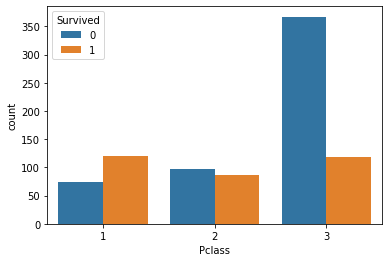

In [115]:
sns.countplot(titanic_df["Pclass"],hue = titanic_df["Survived"],data = titanic_df)

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


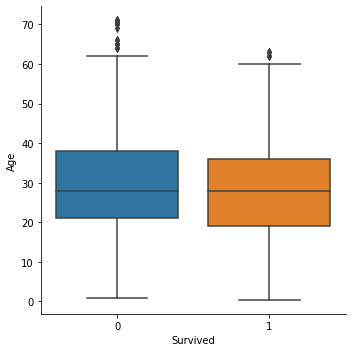

In [116]:
sns.factorplot(x = "Survived", y = "Age", data = titanic_df, kind = "box")
plt.show()

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


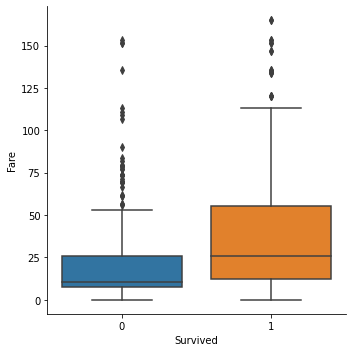

In [117]:
sns.factorplot(x = "Survived", y = "Fare", data = titanic_df, kind = "box")
plt.show()

In [118]:
# Part I: Data Analysis – Netflix dataset

In [119]:
#Load Dataset

In [120]:
netflix_df= pd.read_csv('datasets/netflix_titles.csv')

In [121]:
netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [122]:
netflix_df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [123]:
netflix_df.tail()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,NaN,NaN,NaN,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,Peter Hewitt,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."
8806,s8807,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...


In [124]:
netflix_df.describe()

,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [125]:
netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [126]:
netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [127]:
netflix_df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [128]:
netflix_df.shape

(8807, 12)

In [129]:
netflix_df.ndim

2

In [130]:
#Data Preprocessing:

In [131]:
# Missing Values

In [132]:
netflix_df.nunique()

show_id         8807
type               2
title           8807
director        4528
cast            7692
country          748
date_added      1767
release_year      74
rating            17
duration         220
listed_in        514
description     8775
dtype: int64

In [133]:
netflix_df.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [134]:
netflix_df.drop(columns=['director'],inplace=True)

In [135]:
# imputation

In [136]:
netflix_df['cast'].fillna("Unknown" , inplace=True)

In [137]:
netflix_df['country'].fillna("Unknown" , inplace=True)

In [138]:
netflix_df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Unknown,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,"July 1, 2019",2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,"January 11, 2020",2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [139]:
netflix_df.dropna(axis=0, inplace=True)

In [140]:
# Type convertion

In [141]:
netflix_df['type'] = netflix_df['type'].astype('category')

In [142]:
netflix_df['country'] = netflix_df['country'].astype('category')

In [143]:
netflix_df['title'] = netflix_df['title'].astype(str)

In [144]:
netflix_df["date_added"] = pd.to_datetime(netflix_df['date_added'])


In [145]:
netflix_df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Unknown,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",Unknown,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,Unknown,Unknown,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...
...,...,...,...,...,...,...,...,...,...,...,...
8802,s8803,Movie,Zodiac,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,2019-11-20,2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8803,s8804,TV Show,Zombie Dumb,Unknown,Unknown,2019-07-01,2018,TV-Y7,2 Seasons,"Kids' TV, Korean TV Shows, TV Comedies","While living alone in a spooky town, a young g..."
8804,s8805,Movie,Zombieland,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,2019-11-01,2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...
8805,s8806,Movie,Zoom,"Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...",United States,2020-01-11,2006,PG,88 min,"Children & Family Movies, Comedies","Dragged from civilian life, a former superhero..."


In [146]:
#Data visualization

In [147]:
# count of features

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='type', ylabel='count'>

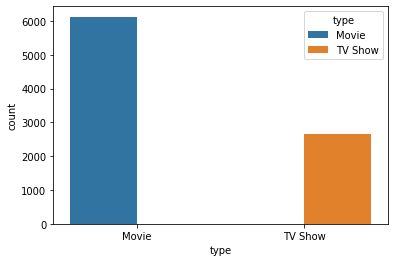

In [148]:
sns.countplot(netflix_df["type"],hue = netflix_df["type"],data = netflix_df)

In [149]:
# top 15 country wise movie count

In [150]:
netflix_df_country = netflix_df.groupby('country').agg({'show_id':'count'}).reset_index()

In [151]:
netflix_df_country = netflix_df_country.sort_values(by=['show_id'],ascending=False)

In [152]:
netflix_df_country_15 = netflix_df_country.iloc[1:15,:]

Text(0, 0.5, 'Count of movies')

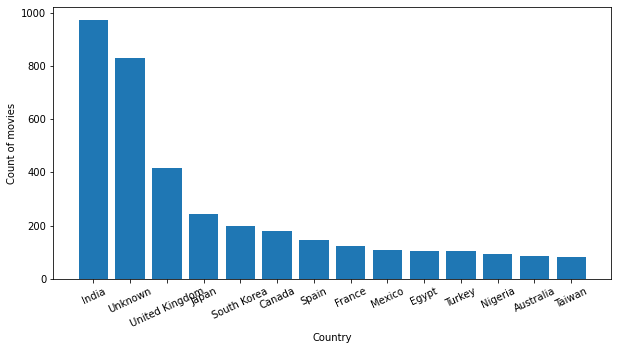

In [153]:
fig = plt.figure(figsize = (10, 5))
plt.bar( netflix_df_country_15['country'],  netflix_df_country_15['show_id'])
plt.xticks(rotation=25) 
plt.xlabel('Country')
plt.ylabel('Count of movies')

In [154]:
# top 15 release year wise 

In [155]:
netflix_df_year = netflix_df.groupby('release_year').agg({'show_id':'count'}).reset_index()

In [156]:
netflix_df_year = netflix_df_year.sort_values(by=['show_id'],ascending=False)

In [157]:
netflix_df_year_15 = netflix_df_year.iloc[1:15,:]

Text(0, 0.5, 'Count of movies')

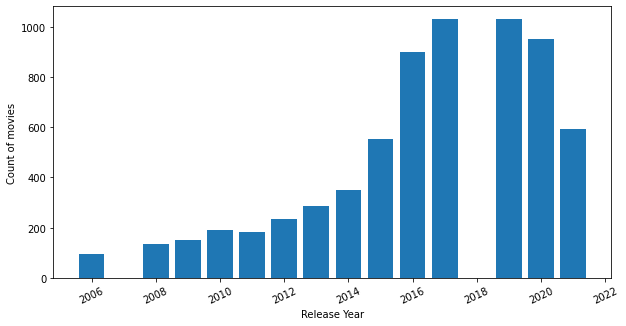

In [158]:
fig = plt.figure(figsize = (10, 5))
plt.bar( netflix_df_year_15['release_year'],  netflix_df_year_15['show_id'])
plt.xticks(rotation=25) 
plt.xlabel('Release Year')
plt.ylabel('Count of movies')

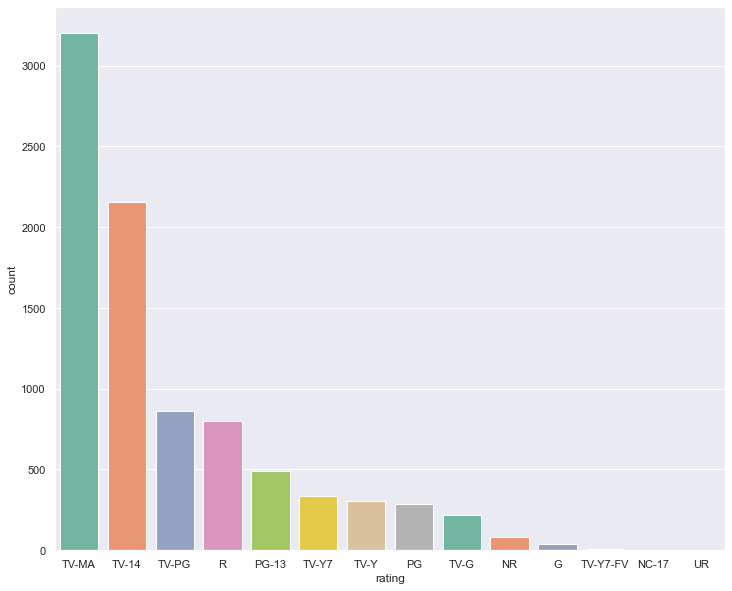

In [159]:
plt.figure(figsize=(12,10))
sns.set(style="darkgrid")
ax = sns.countplot(x="rating", data=netflix_df,
                   palette="Set2", order=netflix_df['rating'].value_counts().index[0:15])